# GO enrichments

Goal: Do cell type enrichment analysis

In [1]:
# Import modules and R
import numpy as np, pandas as pd
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
sys.path.append('../code')
from processing_helpers import *
from analysis_helpers import *
from gradientVersion import *
from enrichments import *
%R source("../code/Rplots.R");

Following explorations below, decide on using dm_hcp_3d_ds5 for enrichments

In [7]:
dm_hcp_3d_ds5 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('hcp_3donors_ds5')
dm_hcp_3d_ds5.fit_weights(sort=True, save_name='weights_dm_hcp_3d_ds5')

New gradients version: method=dm, kernel=normalized_angle, data=hcp_3donors_ds5


0                 1                    2                  3  \
        gene    weight    gene    weight       gene    weight     gene   
0     GPCPD1  0.018467  LGALS1  0.032605       SYT6  0.032240  TBC1D15   
1      SCN1B  0.018330  AHNAK2  0.031618       MICB  0.031730    LAMA5   
2     SEMA7A  0.018319     GAL  0.030931       CA12  0.031484     DPH7   
3       ANK1  0.018293    LCP2  0.030759       FGD4  0.030640    REEP5   
4     RHBDL3  0.018273  CRYBA2  0.030399      COPZ2  0.029414    SUSD6   
...      ...       ...     ...       ...        ...       ...      ...   
7968   PEA15 -0.018405   CRIP3 -0.028477  KIAA1549L -0.034125    ADAD2   
7969  PTGER3 -0.018435   WDR97 -0.028562      HTR3B -0.035438   OR13C5   
7970    PKIA -0.018468   NEK10 -0.029550    RAPGEF2 -0.035579     TTC1   
7971   SSTR1 -0.018560   TENM2 -0.030151      RFTN1 -0.036111    PEX26   
7972  RIPOR2 -0.018686   NR2F1 -0.030570       MAL2 -0.036704   TOMM34   

                       4            
        weight      gene    weight  
0     0.033706     KNOP1  0.040043  
1     0.032783  SLC39A11  0.040001  
2     0.032242       CD9  0.039551  
3     0.032119    KIF13B  0.037495  
4     0.031912     TCFL5  0.037057  
...        ...       ...       ...  
7968 -0.028589    RGS7BP -0.029203  
7969 -0.029743   PHACTR2 -0.029739  
7970 -0.031405     NRXN3 -0.030877  
7971 -0.032540     PRMT8 -0.033940  
7972 -0.032761      PLK2 -0.035636  

[7973 rows x 10 columns]

In [101]:
dm_hcp_ds9 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('hcp_ds9')
dm_hcp_ds9.fit_weights(dm_hcp_3d_ds5.expression, sort=True, save_name='weights_dm_hcp_ds9_fit_3d_ds5', flips=[0])

New gradients version: method=dm, kernel=normalized_angle, data=hcp_ds9


0                   1                   2                    3  \
        gene    weight      gene    weight      gene    weight       gene   
0      SCN1B  0.018632    LGALS1  0.035983      SYT6  0.037913      ADAD2   
1     RHBDL3  0.018594  SLC22A18  0.035677     VSTM1  0.033436     TOMM34   
2     GPCPD1  0.018593     ASGR2  0.034262    RNF152  0.031358      MOXD1   
3       ANK1  0.018592     MUCL1  0.033781     SULF1  0.031295      PEX26   
4      VAMP1  0.018586      GPX3  0.033265   RARRES1  0.031206  LINC00839   
...      ...       ...       ...       ...       ...       ...        ...   
7968  ANKRD6 -0.018569     AKAP7 -0.028148     PTPN3 -0.034967      REEP5   
7969   PEA15 -0.018607     LIMK2 -0.028899     HTR3B -0.035220     CCDC14   
7970   SSTR1 -0.018699     NR2F1 -0.028990   SLC22A9 -0.035242      BMP8B   
7971    PKIA -0.018714   TMSB15A -0.029119  SLC22A10 -0.036344       PNOC   
7972  RIPOR2 -0.018919   BHLHE22 -0.031597     RFTN1 -0.036803    AFAP1L2   

                        4            
        weight       gene    weight  
0     0.041269      VWA3A  0.049557  
1     0.035237      HDAC5  0.042512  
2     0.033185   METTL21C  0.040433  
3     0.031707    SLC14A1  0.040341  
4     0.031472      GULP1  0.040170  
...        ...        ...       ...  
7968 -0.035916       TLX2 -0.039097  
7969 -0.036305      ACKR1 -0.039927  
7970 -0.036539     LRCOL1 -0.041292  
7971 -0.036808  LOC728554 -0.043252  
7972 -0.038005     TWIST1 -0.046258  

[7973 rows x 10 columns]

In [8]:
dm_hcp_base = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('hcp_base')
dm_hcp_ds9.fit_weights(dm_hcp_base.expression, sort=True, save_name='weights_dm_hcp_ds9_fit_base')

New gradients version: method=dm, kernel=normalized_angle, data=hcp_base


0                   1                   2                  3  \
         gene    weight      gene    weight      gene    weight     gene   
0      RIPOR2  0.018111  SLC22A18  0.029815     PTPN3  0.035227   PDZRN4   
1         SLA  0.017904    LGALS1  0.029027     RFTN1  0.033800     DKK2   
2      GABRA5  0.017888     CTXN3  0.028228   SLC22A9  0.033697      NMU   
3      ANKRD6  0.017833      GPX3  0.027576  SLC22A10  0.033513  AFAP1L2   
4       SSTR1  0.017831     MUCL1  0.027539       MET  0.032125    BMP8B   
...       ...       ...       ...       ...       ...       ...      ...   
15940    ANK1 -0.017973     AKAP7 -0.023139    BCL11B -0.028948      TTR   
15941   SCN1A -0.017986     WDR97 -0.023578     VSTM1 -0.029392   TOMM34   
15942  RHBDL3 -0.018118     NR2F1 -0.023692     SULF1 -0.030293    KCNE5   
15943   SCN1B -0.018169       LXN -0.023767   RARRES1 -0.031408    MOXD1   
15944   VAMP1 -0.018180   BHLHE22 -0.026103      SYT6 -0.035985    ADAD2   

                       4            
         weight     gene    weight  
0      0.031527    HSPB8  0.035347  
1      0.030181    VWA3A  0.034764  
2      0.029620  SLC14A1  0.031755  
3      0.029393     ZIC1  0.031506  
4      0.028531   AHCYL1  0.031001  
...         ...      ...       ...  
15940 -0.022855    ACKR1 -0.030458  
15941 -0.025879     TLX2 -0.030652  
15942 -0.028561    PRSS3 -0.030699  
15943 -0.028659     CD52 -0.031522  
15944 -0.030161   TWIST1 -0.035010  

[15945 rows x 10 columns]

In [105]:
dm_hcp_3d = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('hcp_3donors')
dm_hcp_ds9.fit_weights(dm_hcp_3d.expression, sort=True, save_name='weights_dm_hcp_ds9_fit_3d', flips=[0])

New gradients version: method=dm, kernel=normalized_angle, data=hcp_3donors


0                   1                   2                   3  \
         gene    weight      gene    weight      gene    weight      gene   
0       SCN1B  0.016813    LGALS1  0.028610      SYT6  0.031764     ADAD2   
1      RHBDL3  0.016778  SLC22A18  0.028366     VSTM1  0.028013    TOMM34   
2      GPCPD1  0.016778     ASGR2  0.027241    RNF152  0.026272     MOXD1   
3        ANK1  0.016777     MUCL1  0.026859     SULF1  0.026220     ACBD7   
4       VAMP1  0.016771      GPX3  0.026449   RARRES1  0.026145     PEX26   
...       ...       ...       ...       ...       ...       ...       ...   
15941  ANKRD6 -0.016756     AKAP7 -0.022380     PTPN3 -0.029296  C15orf39   
15942   PEA15 -0.016790     LIMK2 -0.022978     HTR3B -0.029508    CCDC14   
15943   SSTR1 -0.016874     NR2F1 -0.023050   SLC22A9 -0.029526     BMP8B   
15944    PKIA -0.016887   TMSB15A -0.023152  SLC22A10 -0.030450      PNOC   
15945  RIPOR2 -0.017072   BHLHE22 -0.025123     RFTN1 -0.030834   AFAP1L2   

                         4            
         weight       gene    weight  
0      0.029422      VWA3A  0.037071  
1      0.025122      HDAC5  0.031802  
2      0.023658   METTL21C  0.030246  
3      0.023204    SLC14A1  0.030177  
4      0.022604      GULP1  0.030050  
...         ...        ...       ...  
15941 -0.025849       TLX2 -0.029247  
15942 -0.025883      ACKR1 -0.029867  
15943 -0.026050     LRCOL1 -0.030889  
15944 -0.026242  LOC728554 -0.032355  
15945 -0.027095     TWIST1 -0.034604  

[15946 rows x 10 columns]

In [122]:
dm_dk_ds5 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('dk_ds5')
dm_dk_ds5.fit_weights(sort=True, save_name='weights_dm_dk_ds5', flips=[0])

New gradients version: method=dm, kernel=normalized_angle, data=dk_ds5


0                   1                  2                  3  \
            gene    weight      gene    weight     gene    weight     gene   
0           URM1  0.015331      PDK3  0.029917    CELF1  0.035175    YPEL2   
1          SYCP2  0.015304    RANBP9  0.029199    PGAP3  0.035135    ATP7A   
2     MIR29B2CHG  0.015293    MAPK13  0.029066  NEUROD1  0.034417     FZD5   
3         GPCPD1  0.015257     NDEL1  0.029026   LINGO2  0.034368     RYBP   
4        FASTKD1  0.015253     RASD1  0.028952  KHDRBS2  0.033844   ZNF524   
...          ...       ...       ...       ...      ...       ...      ...   
7968       PRKCD -0.015356  HIST1H1C -0.026786    ABCC9 -0.030801  ANKRD42   
7969       RAP2B -0.015360      EML4 -0.026832    CPT1A -0.031988    PEX26   
7970        STUM -0.015364      USP3 -0.026937    ANXA4 -0.032413     GNAL   
7971       PEA15 -0.015367    ATP10D -0.028098    COTL1 -0.033105  ALDH5A1   
7972      RIPOR2 -0.015391    CMKLR1 -0.028686   CRYBG3 -0.034084    ADAD2   

                       4            
        weight      gene    weight  
0     0.036371     MYCT1  0.044574  
1     0.035091     SULF1  0.044053  
2     0.034858    RASSF3  0.043971  
3     0.034058  FAM189A1  0.043017  
4     0.033919      LMO7  0.042788  
...        ...       ...       ...  
7968 -0.031667   ANKRD65 -0.035611  
7969 -0.032297   CYP26B1 -0.035707  
7970 -0.032343    SAPCD2 -0.037337  
7971 -0.033206     AGAP1 -0.038023  
7972 -0.034156    CHI3L1 -0.038620  

[7973 rows x 10 columns]

In [116]:
enrichments_keywords = combine_enrichments('dm_hcp_3d_ds5', 'Keyword', include_g1=True)
enrichments_process = combine_enrichments('dm_hcp_3d_ds5', 'Process', include_g1=True)
enrichments_process.head()

,G,description,n_genes,direction,enrichment,FDR,neglogFDR,rank
0,G2,Generation of precursor metabolites and energy,179,bottom,1.83935,0.00065,3.187087,10.0
1,G2,"Regulation of gene expression, epigenetic",72,top,2.03254,0.00065,3.187087,11.0
2,G2,Mitochondrion organization,181,bottom,1.49670,0.00200,2.698970,9.0
3,G2,Steroid metabolic process,105,bottom,1.61331,0.00260,2.585027,8.0
4,G2,Steroid biosynthetic process,62,bottom,2.24300,0.00340,2.468521,7.0


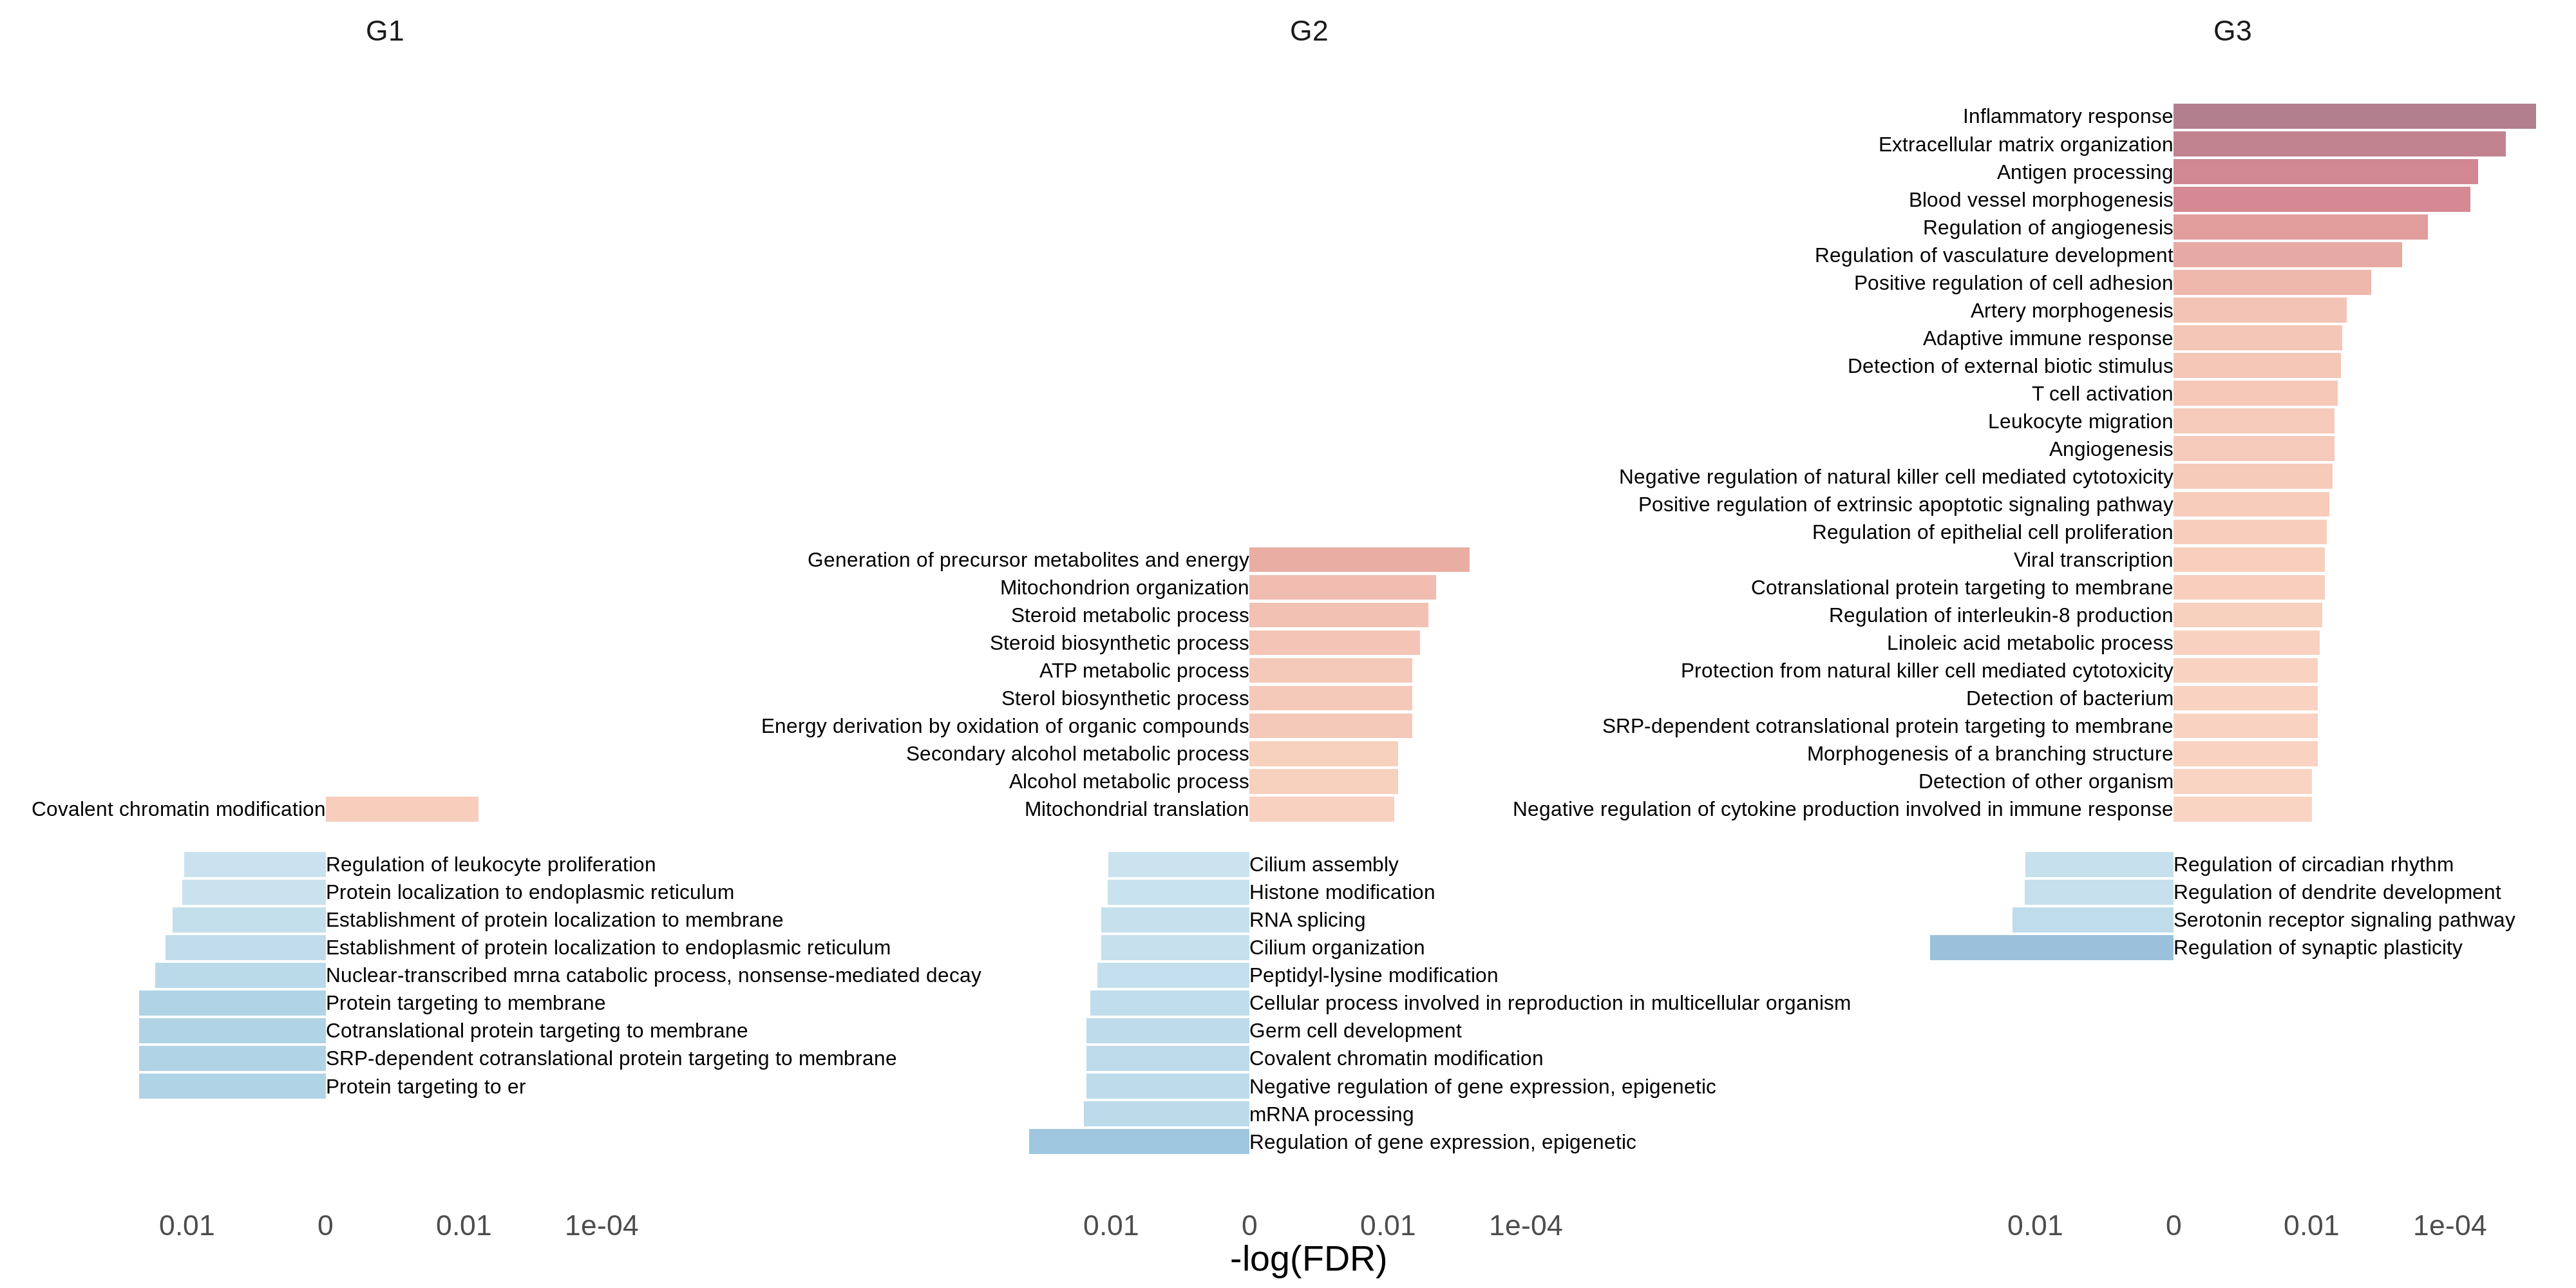

In [117]:
%%R -w 20 -h 10 --units in -r 200 -i enrichments_process -i enrichments_keywords
source("../code/enrichmentsPlots.R")
plot_enrichments(enrichments_process)

In [102]:
enrichments_process = combine_enrichments('dm_hcp_ds9_fit_3d_ds5', 'Process', include_g1=True)

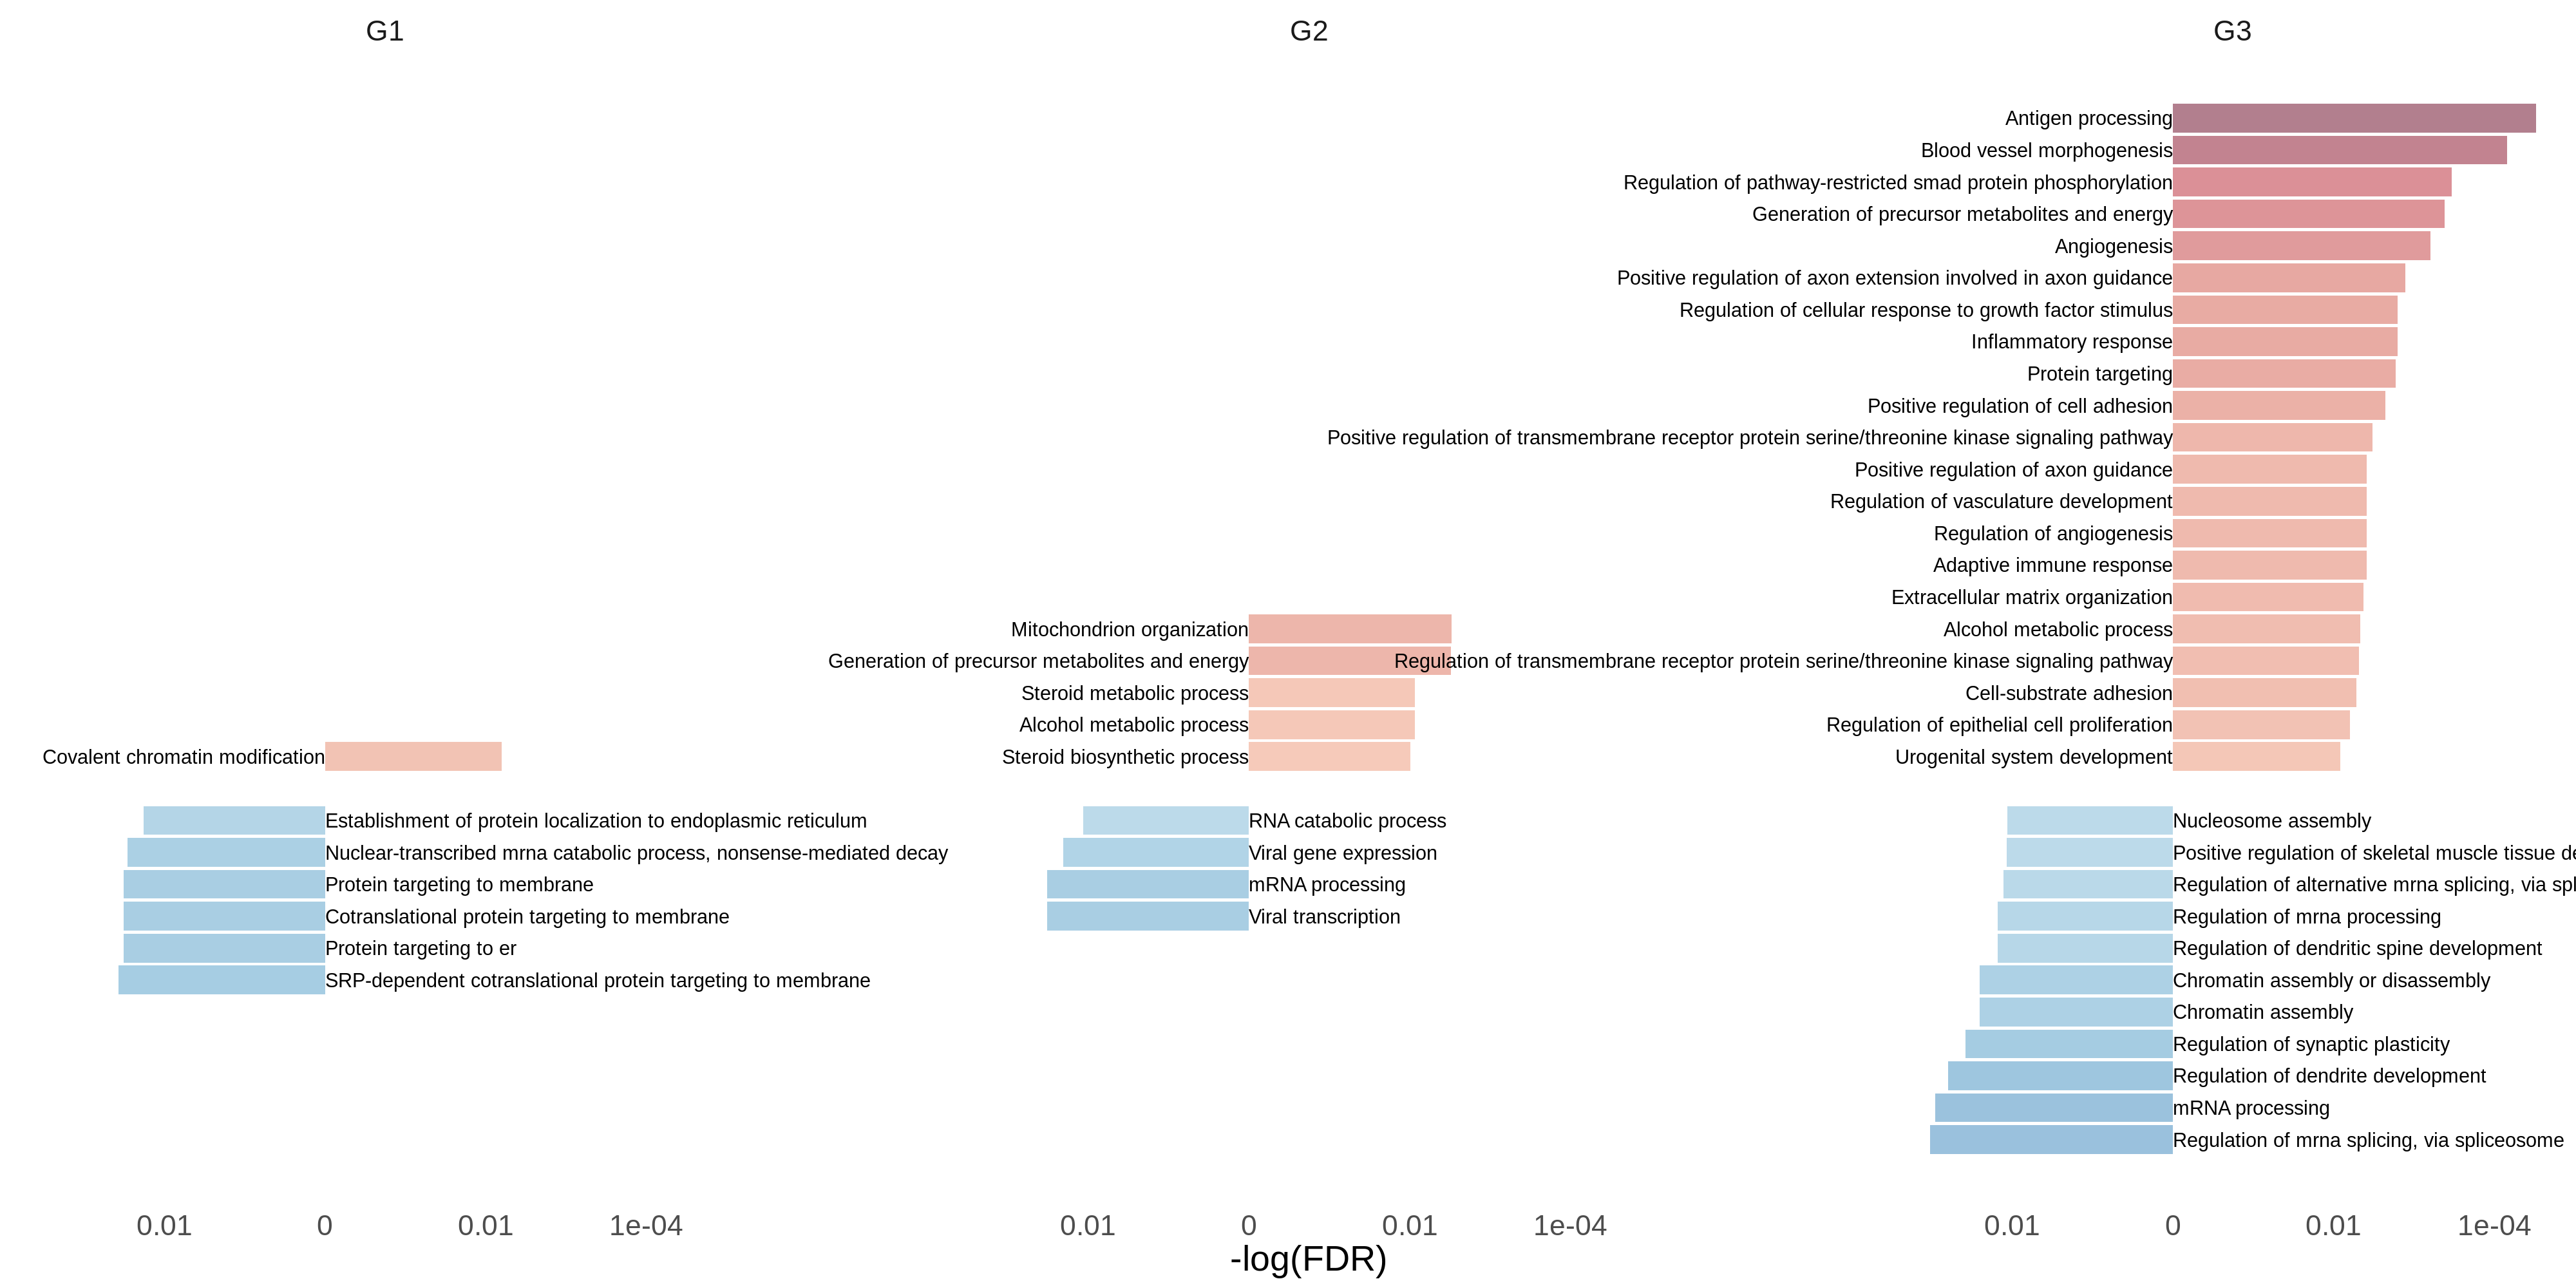

In [103]:
%%R -w 20 -h 10 --units in -r 200 -i enrichments_process
source("../code/enrichmentsPlots.R")
plot_enrichments(enrichments_process)

In [106]:
enrichments_process = combine_enrichments('dm_hcp_ds9_fit_3d', 'Process', include_g1=True)

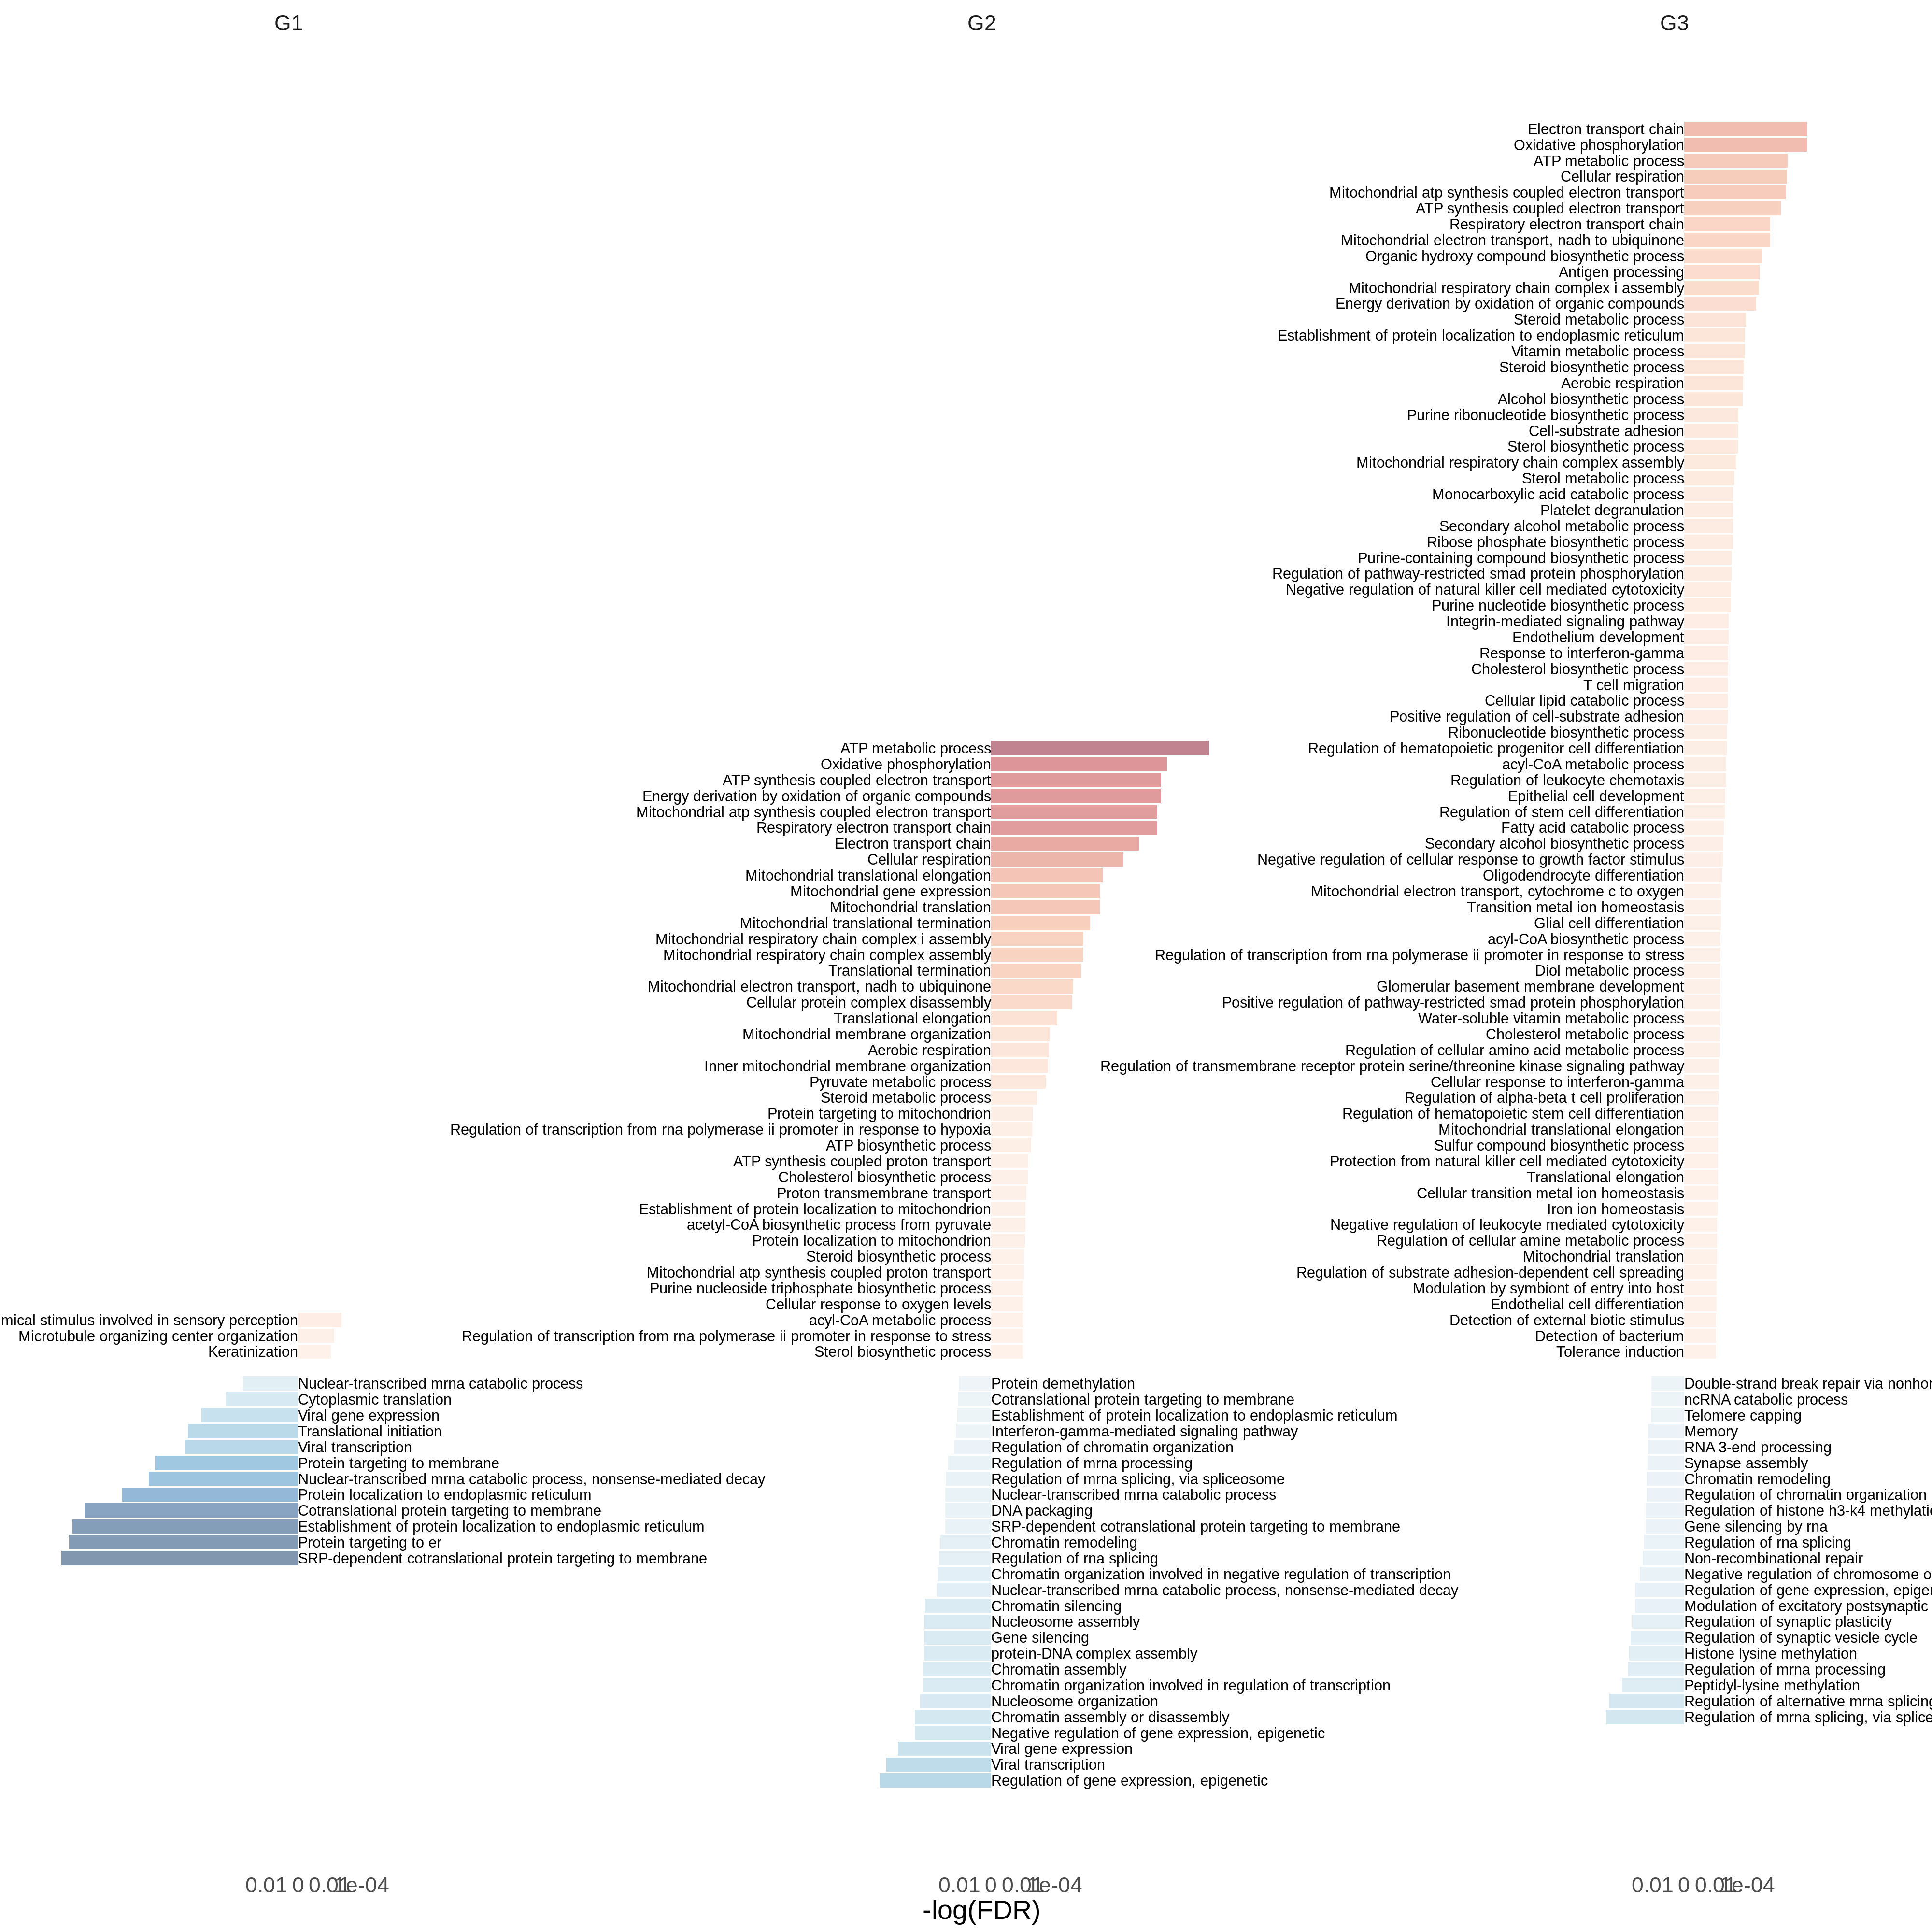

In [112]:
%%R -w 20 -h 20 --units in -r 200 -i enrichments_process
source("../code/enrichmentsPlots.R")
plot_enrichments(enrichments_process)

In [109]:
%%R -w 2000 -h 2000 -i enrichments_process -i enrichments_keywords
source("../code/enrichmentsPlots.R")
g1 <- plot_enrichments(enrichments_process, n=14) + ggtitle('GO Biological Process Enrichment')
g2 <- plot_enrichments(enrichments_keywords, n=15) + ggtitle('Uniprot Keyword Enrichment')

(g1 | g2) & theme(text=element_text(size=36))

  unused argument (n = 14)







Error in plot_enrichments(enrichments_process, n = 14) : 
  unused argument (n = 14)


---

# Legacy

In [166]:
# get_expression_abagen(fetch_hcp(), DS_threshold=0, donors_threshold=2, save_name='hcp_2donors_ibf9', ibf_threshold=0.9)
# get_expression_abagen(fetch_hcp(), DS_threshold=0, donors_threshold=2, save_name='hcp_2donors_leftonly', lr_mirror=None)
get_expression_abagen(fetch_hcp(), DS_threshold=0.9, donors_threshold=2, save_name='hcp_2donors_ds9_leftonly', lr_mirror=None)

1601 genes remain after filtering for top 0.1 differential stability


gene_symbol,A1BG,ABCG4,ABCG5,ABHD12B,ABLIM2,ABLIM3,ABTB2,ACAN,ACKR3,ACOT2,...,ZNF436,ZNF502,ZNF521,ZNF677,ZNF706,ZNF831,ZNRF1,ZSCAN18,ZSCAN9,ZYX
label,,,,,,,,,,,,,,,,,,,,,
1,0.218920,0.732211,0.335780,0.137392,0.202454,0.160830,0.884535,0.874641,0.285164,0.235159,...,0.207405,0.883818,0.460068,0.419782,0.142370,0.106713,0.283006,0.153919,0.832619,0.850030
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.335346,0.579254,0.347680,0.182971,0.159035,0.139181,0.756141,0.829130,0.169018,0.165187,...,0.189472,0.787459,0.346474,0.531070,0.149126,0.130715,0.250315,0.163310,0.738933,0.787673
5,0.227623,0.772734,0.224071,0.193516,0.280592,0.174622,0.751605,0.830943,0.331445,0.245406,...,0.294314,0.843049,0.243372,0.425845,0.251133,0.150447,0.313315,0.171505,0.681718,0.809557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
data_dir = "~/rds/rds-cam-psych-transc-Pb9UGUlrwWc/Cam_LIBD/AHBA_data/abagen-data/expression/"

hcp_ds9 = pd.read_csv(data_dir + 'hcp_ds9.csv', index_col=0)

# hcp_2d_ds8 = pd.read_csv(data_dir + 'hcp_2donors_ds8.csv', index_col=0)
# hcp_2d_ds5 = pd.read_csv(data_dir + 'hcp_2donors_ds5.csv', index_col=0)
# hcp_2d = pd.read_csv(data_dir + 'hcp_2donors.csv', index_col=0)

# hcp_3d_ds5 = pd.read_csv(data_dir + 'hcp_3donors_ds5.csv', index_col=0)
# hcp_3d_ds6 = pd.read_csv(data_dir + 'hcp_3donors_ds6.csv', index_col=0)

# hcp_2d_ds6 = pd.read_csv(data_dir + 'hcp_2donors_ds6.csv', index_col=0)
# hcp_2d_ds7 = pd.read_csv(data_dir + 'hcp_2donors_ds7.csv', index_col=0)
# hcp_2d_ds9 = pd.read_csv(data_dir + 'hcp_2donors_ds9.csv', index_col=0)
# hcp_2d_ds9_leftonly = pd.read_csv(data_dir + 'hcp_2donors_ds9_leftonly.csv', index_col=0)

# dm_2d_ds9 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit(hcp_2d_ds9)
# dm_2d_ds5 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit(hcp_2d_ds5)
# dm_2d_ds6 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit(hcp_2d_ds6)
# dm_3d_ds5 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit(hcp_3d_ds5)
# dm_3d_ds6 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit(hcp_3d_ds6)

dm_ds9 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit(hcp_ds9)

New gradients version: method=dm, sparsity=0, kernel=normalized_angle


In [182]:
dm_ds9.fit_weights(hcp_3d_ds5, independent=True, sort=True, save_name='weights_dm_ds9_ds5')

0                   1                   2          
        gene    weight      gene    weight      gene    weight
0     RIPOR2  0.018919    LGALS1  0.035983      SYT6  0.037912
1       PKIA  0.018714  SLC22A18  0.035677     VSTM1  0.033437
2      SSTR1  0.018699     ASGR2  0.034262    RNF152  0.031359
3      PEA15  0.018607     MUCL1  0.033781     SULF1  0.031295
4     ANKRD6  0.018569      GPX3  0.033266   RARRES1  0.031207
...      ...       ...       ...       ...       ...       ...
7968   VAMP1 -0.018586     AKAP7 -0.028148     PTPN3 -0.034967
7969    ANK1 -0.018592     LIMK2 -0.028901     HTR3B -0.035219
7970  GPCPD1 -0.018593     NR2F1 -0.028989   SLC22A9 -0.035242
7971  RHBDL3 -0.018593   TMSB15A -0.029119  SLC22A10 -0.036344
7972   SCN1B -0.018632   BHLHE22 -0.031598     RFTN1 -0.036801

[7973 rows x 6 columns]

In [177]:
# hcp_2d_leftonly = pd.read_csv(data_dir + 'hcp_2donors_leftonly.csv', index_col=0)
# dm_2d_ds6.fit_weights(independent=True, sort=True, save_name='weights_dm_2d_ds6_ds6')
dm_3d_ds5.fit_weights(independent=True, sort=True, save_name='weights_dm_3d_ds5_ds5')
dm_3d_ds6.fit_weights(independent=True, sort=True, save_name='weights_dm_3d_ds6_ds6')

0                 1                    2          
        gene    weight    gene    weight       gene    weight
0     RIPOR2  0.019790  LGALS1  0.036102      RFTN1  0.042285
1      SSTR1  0.019636  AHNAK2  0.034940       MAL2  0.042004
2       PKIA  0.019569     GAL  0.034559    RAPGEF2  0.041574
3     PTGER3  0.019517    LCP2  0.034003      HTR3B  0.041255
4      PEA15  0.019515   SKAP1  0.033518  KIAA1549L  0.039271
...      ...       ...     ...       ...        ...       ...
6374  RHBDL3 -0.019411   CRIP3 -0.031527     BTN2A2 -0.033824
6375    ANK1 -0.019418   WDR97 -0.031982       FGD4 -0.034558
6376  SEMA7A -0.019420   NEK10 -0.032437       CA12 -0.037032
6377   SCN1B -0.019459   TENM2 -0.033352       MICB -0.037547
6378  GPCPD1 -0.019567   NR2F1 -0.033701       SYT6 -0.038840

[6379 rows x 6 columns]

In [81]:
dm_2d_ds8.fit_weights(hcp_2d, independent=True, sort=True, save_name='weights_dm_2d_all')

0                   1                   2          
         gene    weight      gene    weight      gene    weight
0      RIPOR2  0.017769    LGALS1  0.028325     RFTN1  0.033259
1        PKIA  0.017509  SLC22A18  0.027718     HTR3B  0.031432
2       SSTR1  0.017442    AHNAK2  0.026203     PTPN3  0.030119
3      PTGER3  0.017431     ASGR2  0.026140     RCSD1  0.029174
4      ANKRD6  0.017428     CTXN3  0.025950  SERPINF1  0.029070
...       ...       ...       ...       ...       ...       ...
15941  RHBDL3 -0.017199     TENM2 -0.021979     LMCD1 -0.025994
15942  SEMA7A -0.017209   TMSB15A -0.021980      GPD1 -0.026014
15943   VAMP1 -0.017290   BHLHE22 -0.022116     KANK4 -0.026353
15944   SCN1B -0.017363     WDR97 -0.022338      MICB -0.027818
15945  GPCPD1 -0.017466     NR2F1 -0.023647      SYT6 -0.031570

[15946 rows x 6 columns]

String outputs

In [112]:
enrichments_dir = "../outputs/string_data/dm_2d_ds8_all/"
enrichments_files = {'PC2': enrichments_dir + 'pc2_enrichment.Process.tsv', 
                     'PC3': enrichments_dir + 'pc3_enrichment.Process.tsv'}

enrichments = (pd.concat({name:pd.read_csv(file, delimiter='\t') for name, file in enrichments_files.items()})
               .reset_index(0).rename({'level_0':'component'}, axis=1)
               .assign(top_bottom = lambda x: np.where(x['component'] == 'PC2', 'bottom', 'top')) # select whether to keep top or bottom
               .loc[lambda x: x['top_bottom'] == x['direction']] # filter for top or bottom
               .assign(logFDR = lambda x: -np.log10(x['false discovery rate']))
               .assign(rank = lambda x: x.groupby('component')['logFDR'].apply(lambda y: len(y) - y.rank()))
               .assign(enrichment = lambda x: x['enrichment score'],
                       n_genes = lambda x: x['genes mapped'],
                       description = lambda x: x['term description']
                      )
               .loc[:, ['component', 'logFDR', 'rank', 'enrichment', 'n_genes', 'description']]
              )
enrichments_string = enrichments
enrichments.loc[lambda x: x['component']=='PC3'].head(20)

,component,logFDR,rank,enrichment,n_genes,description
1,PC3,4.610834,3.0,5.364090,10,Antigen processing and presentation of peptide...
2,PC3,4.610834,3.0,4.630710,12,Antigen processing and presentation via mhc cl...
3,PC3,4.610834,3.0,5.315410,9,Antigen processing and presentation of endogen...
4,PC3,4.610834,3.0,5.115010,8,Antigen processing and presentation of exogeno...
5,PC3,4.610834,3.0,4.466170,18,Antigen processing and presentation of endogen...
6,PC3,4.610834,3.0,1.205280,161,Glial cell differentiation
7,PC3,4.610834,3.0,4.052470,20,Antigen processing and presentation of endogen...
9,PC3,4.334419,7.0,1.073510,150,Cell-substrate adhesion
10,PC3,3.958607,8.5,1.416850,79,Endothelium development
11,PC3,3.958607,8.5,1.344290,127,Response to interferon-gamma


Gorilla outputs

In [120]:
enrichments_dir = "../outputs/gorilla_data/"
enrichments_files = {'PC2': enrichments_dir + 'pc2_dm_2d_ds5.csv', 
                     'PC3': enrichments_dir + 'pc3_dm_2d_ds5.csv'}

enrichments = (pd.concat({name:pd.read_csv(file) for name, file in enrichments_files.items()})
               .reset_index(0).rename({'level_0':'component'}, axis=1)
               .assign(logFDR = lambda x: -np.log10(x['FDR q-value']))
               .assign(rank = lambda x: x.groupby('component')['logFDR'].apply(lambda y: len(y) - y.rank()))
               .assign(enrichment = lambda x: x['Enrichment (N, B, n, b)'].str[:4].str.replace(',','.').astype('float'),
                       n_genes = 50,
                       description = lambda x: x['Description']
                      )
               .loc[:, ['component', 'logFDR', 'rank', 'enrichment', 'n_genes', 'description']]
              )
enrichments_gorilla = enrichments
enrichments.loc[lambda x: x['component']=='PC3'].head(20)

,component,logFDR,rank,enrichment,n_genes,description
0,PC3,8.045757,0.0,1.37,50,immune system process
1,PC3,7.320572,1.0,3.23,50,angiogenesis
2,PC3,5.617983,3.0,1.44,50,cell activation
3,PC3,5.642065,2.0,1.48,50,immune response
4,PC3,5.446117,4.0,1.34,50,developmental process
5,PC3,5.241088,5.0,2.46,50,extracellular structure organization
6,PC3,5.157391,7.0,1.53,50,regulation of cell proliferation
7,PC3,5.160522,6.0,6.71,50,antigen processing and presentation of endogen...
8,PC3,5.145694,8.0,1.91,50,regulation of cell adhesion
9,PC3,5.116339,9.0,1.80,50,regulation of cell motility


In [133]:
import gseapy as gp

Creating directory /home/rajd2/.config/bioservices 


In [135]:
weights = dm_2d_ds8.fit_weights(hcp_2d, independent=True, sort=True, save_name='weights_dm_2d_all')

In [136]:
weights[1]

,gene,weight
0,LGALS1,0.028325
1,SLC22A18,0.027718
2,AHNAK2,0.026203
3,ASGR2,0.026140
4,CTXN3,0.025950
...,...,...
15941,TENM2,-0.021979
15942,TMSB15A,-0.021980
15943,BHLHE22,-0.022116
15944,WDR97,-0.022338


In [138]:
pc2 = gp.prerank(rnk=weights[1],
                 gene_sets="../data/c5.go.bp.v7.5.1.symbols.gmt",
                 processes=4,
                 permutation_num=10,
                 verbose=True,
                 outdir='../outputs/gseapy_pc2')

In [144]:
pc3 = gp.prerank(rnk=weights[2],
                 gene_sets="../data/c5.go.bp.v7.5.1.symbols.gmt",
                 processes=16,
                 permutation_num=1000,
                 verbose=True,
                 outdir='../outputs/gseapy_pc3')

In [154]:
# pc3.res2d.loc[lambda x: x['fdr'] < .01]
pc3.res2d.loc[lambda x: x.index.str.contains('IMMUNE')]

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
GOBP_NEGATIVE_REGULATION_OF_IMMUNE_EFFECTOR_PROCESS,-0.472938,-1.963912,0.000000,0.014616,112,76,PPP3CB;SOCS5;SERPING1;RC3H2;CLEC4G;ARG1;JAK3;R...,PARP3;GRN;DUSP10;LILRB4;SERPINB9;CD84;PTPRC;LG...
GOBP_IMMUNE_RESPONSE_TO_TUMOR_CELL,-0.619700,-1.892046,0.000000,0.021959,25,19,HMGB1;FBXO38;AHR;PVR;NECTIN2;CD274;CEACAM1;PRF...,IL4I1;HAVCR2;ADAM15;HSPD1;HLA-DRB1;HLA-A;HLA-D...
GOBP_NEGATIVE_REGULATION_OF_PRODUCTION_OF_MOLECULAR_MEDIATOR_OF_IMMUNE_RESPONSE,-0.587697,-1.873326,0.000000,0.024942,38,22,ARG1;JAK3;CUEDC2;SLAMF1;APOA1;NDFIP1;IL13RA2;T...,PARP3;LILRB4;TGFB3;CD22;TGFB2;IRAK3;TMBIM6;SMA...
GOBP_ADAPTIVE_IMMUNE_RESPONSE,-0.341162,-1.702605,0.000000,0.056758,719,287,RFTN1;CAMK4;TNFSF13B;TNFRSF11A;C1R;STAT6;ARID5...,PDCD1;JAM3;P2RX7;ZAP70;PARP3;FUT7;C1QBP;KLRC2;...
GOBP_NEGATIVE_REGULATION_OF_IMMUNE_SYSTEM_PROCESS,-0.336450,-1.698102,0.000000,0.058422,425,297,PIK3R1;CARTPT;TYRO3;CD200;PTPRJ;BANK1;STAT6;PP...,GRN;FSTL3;CCL25;C1QC;DUSP10;MILR1;LILRB4;SERPI...
GOBP_IMMUNE_RESPONSE_REGULATING_SIGNALING_PATHWAY,-0.335554,-1.692835,0.000000,0.059923,479,308,RFTN1;CACNB3;RTN4;TYRO3;PAK1;FOXP1;PTPRJ;PDPK1...,F2RL1;CD226;TRIL;EIF2B2;UNC93B1;BAX;BLNK;BIRC2...
GOBP_IMMUNOGLOBULIN_PRODUCTION_INVOLVED_IN_IMMUNOGLOBULIN_MEDIATED_IMMUNE_RESPONSE,-0.438763,-1.662836,0.003984,0.065445,73,49,STAT6;NBN;RNF8;MSH2;KMT5B;LIG4;IL27RA;HMCES;AT...,TRAF3IP2;PTPRC;MSH6;HLA-DOB;TFRC;SWAP70;HLA-DM...
GOBP_NEGATIVE_REGULATION_OF_CYTOKINE_PRODUCTION_INVOLVED_IN_IMMUNE_RESPONSE,-0.586086,-1.663482,0.014056,0.065937,27,16,ARG1;JAK3;CUEDC2;SLAMF1;APOA1;BST2;TNF;LILRB4;...,TGFB3;TGFB2;IRAK3;SMAD7;BCL6;HLA-F;HMOX1;ANGPT1
GOBP_CELL_ACTIVATION_INVOLVED_IN_IMMUNE_RESPONSE,-0.344148,-1.646454,0.000000,0.071281,291,193,C12orf4;FOXP1;PDPK1;STAT6;FES;SOCS5;NLRP3;STXB...,KLRC2;GRN;APBB1IP;MILR1;CD84;PTPRC;NR4A3;UNC13...


---

In [11]:
from gprofiler import GProfiler

Get PCs

In [25]:
data_dir = "~/rds/rds-cam-psych-transc-Pb9UGUlrwWc/Cam_LIBD/AHBA_data/abagen-data/expression/"
# hcp_base = pcaVersion(pd.read_csv(data_dir + 'hcp_base.csv', index_col=0))
# hcp_3donors_ds8 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds8.csv', index_col=0))
hcp_3donors_ds7 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds7.csv', index_col=0))
# hcp_3donors_ds5 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds5.csv', index_col=0))
pc_version = hcp_3donors_ds5

New PCA version


In [26]:
hcp_3donors_ds7.sort_genes().to_csv("../outputs/gene_weights_hcp_3donors_ds7.csv")

In [24]:
pc3 = (GProfiler(return_dataframe=True)
 .profile(organism='hsapiens',
          significance_threshold_method='fdr',
          # ordered=True,
          # all_results=True,
          sources=['GO:BP'],
          background=list(pc_version.sort_genes()[1]['gene']),
          query=list(pc_version.sort_genes()[1]['gene'][:1000])
         )
)
pc3

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,GO:BP,GO:0006091,generation of precursor metabolites and energy,0.004418,True,"""The chemical reactions and pathways resulting...",217,964,53,7752,0.054979,0.244240,query_1,[GO:0044237]
1,GO:BP,GO:0009060,aerobic respiration,0.005097,True,"""The enzymatic release of energy from inorgani...",71,964,24,7752,0.024896,0.338028,query_1,[GO:0045333]
2,GO:BP,GO:0015980,energy derivation by oxidation of organic comp...,0.005097,True,"""The chemical reactions and pathways by which ...",143,964,38,7752,0.039419,0.265734,query_1,[GO:0006091]
3,GO:BP,GO:0046034,ATP metabolic process,0.005097,True,"""The chemical reactions and pathways involving...",100,964,30,7752,0.031120,0.300000,query_1,[GO:0008152]
4,GO:BP,GO:0007005,mitochondrion organization,0.006761,True,"""A process that is carried out at the cellular...",209,964,49,7752,0.050830,0.234450,query_1,[GO:0006996]
5,GO:BP,GO:0044281,small molecule metabolic process,0.006761,True,"""The chemical reactions and pathways involving...",783,964,138,7752,0.143154,0.176245,query_1,[GO:0008152]
6,GO:BP,GO:0006119,oxidative phosphorylation,0.014940,True,"""The phosphorylation of ADP to ATP that accomp...",50,964,18,7752,0.018672,0.360000,query_1,"[GO:0009060, GO:0046034]"
7,GO:BP,GO:0019752,carboxylic acid metabolic process,0.014940,True,"""The chemical reactions and pathways involving...",384,964,76,7752,0.078838,0.197917,query_1,[GO:0043436]
8,GO:BP,GO:0043436,oxoacid metabolic process,0.015432,True,"""The chemical reactions and pathways involving...",392,964,77,7752,0.079876,0.196429,query_1,[GO:0006082]
9,GO:BP,GO:0006082,organic acid metabolic process,0.022027,True,"""The chemical reactions and pathways involving...",397,964,77,7752,0.079876,0.193955,query_1,"[GO:0044237, GO:0044281, GO:0071704]"


In [122]:
pc3 = (GProfiler(return_dataframe=True)
 .profile(organism='hsapiens',
          significance_threshold_method='fdr',
          ordered=True,
          all_results=True,
          sources=['GO:BP'],
          background=list(pc_version.sort_genes()[2]['gene']),
          query=list(pc_version.sort_genes()[2]['gene'][:2000])
         )
)
pc3

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,GO:BP,GO:0002399,MHC class II protein complex assembly,0.274459,False,"""The aggregation, arrangement and bonding toge...",9,1296,9,7752,0.006944,1.000000,query_1,[GO:0002396]
1,GO:BP,GO:0000132,establishment of mitotic spindle orientation,0.274459,False,"""A cell cycle process that sets the alignment ...",12,114,5,7752,0.043860,0.416667,query_1,"[GO:0040001, GO:0051294]"
2,GO:BP,GO:0002503,peptide antigen assembly with MHC class II pro...,0.274459,False,"""The binding of a peptide to the antigen bindi...",9,1296,9,7752,0.006944,1.000000,query_1,"[GO:0002399, GO:0002495, GO:0002501]"
3,GO:BP,GO:0002486,antigen processing and presentation of endogen...,0.276260,False,"""The process in which an antigen-presenting ce...",3,482,3,7752,0.006224,1.000000,query_1,[GO:0002484]
4,GO:BP,GO:0002483,antigen processing and presentation of endogen...,0.276260,False,"""The process in which an antigen-presenting ce...",11,1182,10,7752,0.008460,0.909091,query_1,"[GO:0019883, GO:0048002]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9243,GO:BP,GO:0036500,ATF6-mediated unfolded protein response,1.000000,False,"""A series of molecular signals mediated by the...",3,1271,1,7752,0.000787,0.333333,query_1,"[GO:0006984, GO:0030968]"
9244,GO:BP,GO:0036499,PERK-mediated unfolded protein response,1.000000,False,"""A series of molecular signals mediated by the...",6,1480,2,7752,0.001351,0.333333,query_1,"[GO:0006984, GO:0030968, GO:0140467]"
9245,GO:BP,GO:0036498,IRE1-mediated unfolded protein response,1.000000,False,"""A series of molecular signals mediated by the...",7,673,1,7752,0.001486,0.142857,query_1,[GO:0030968]
9246,GO:BP,GO:0035150,regulation of tube size,1.000000,False,"""Ensuring that a tube is of the correct length...",68,670,6,7752,0.008955,0.088235,query_1,[GO:0090066]


---

## GOrilla and Revigo

In [153]:
output_PC_gene_ranks(hcp_3donors_ds5, 'gene_weights_hcp_3donors_ds5')

In [141]:
output_PC_region_scores(hcp_3donors_ds8, 'region_scores_hcp_3donors_ds8')
# output_PC_region_scores(hcp_base.score_from(hcp_3donors_ds8), 'region_scores_hcp_3donors_ds8_projected')
# output_PC_region_scores(dk_ds5.scores, 'region_scores_dk_ds5', atlas='dk')

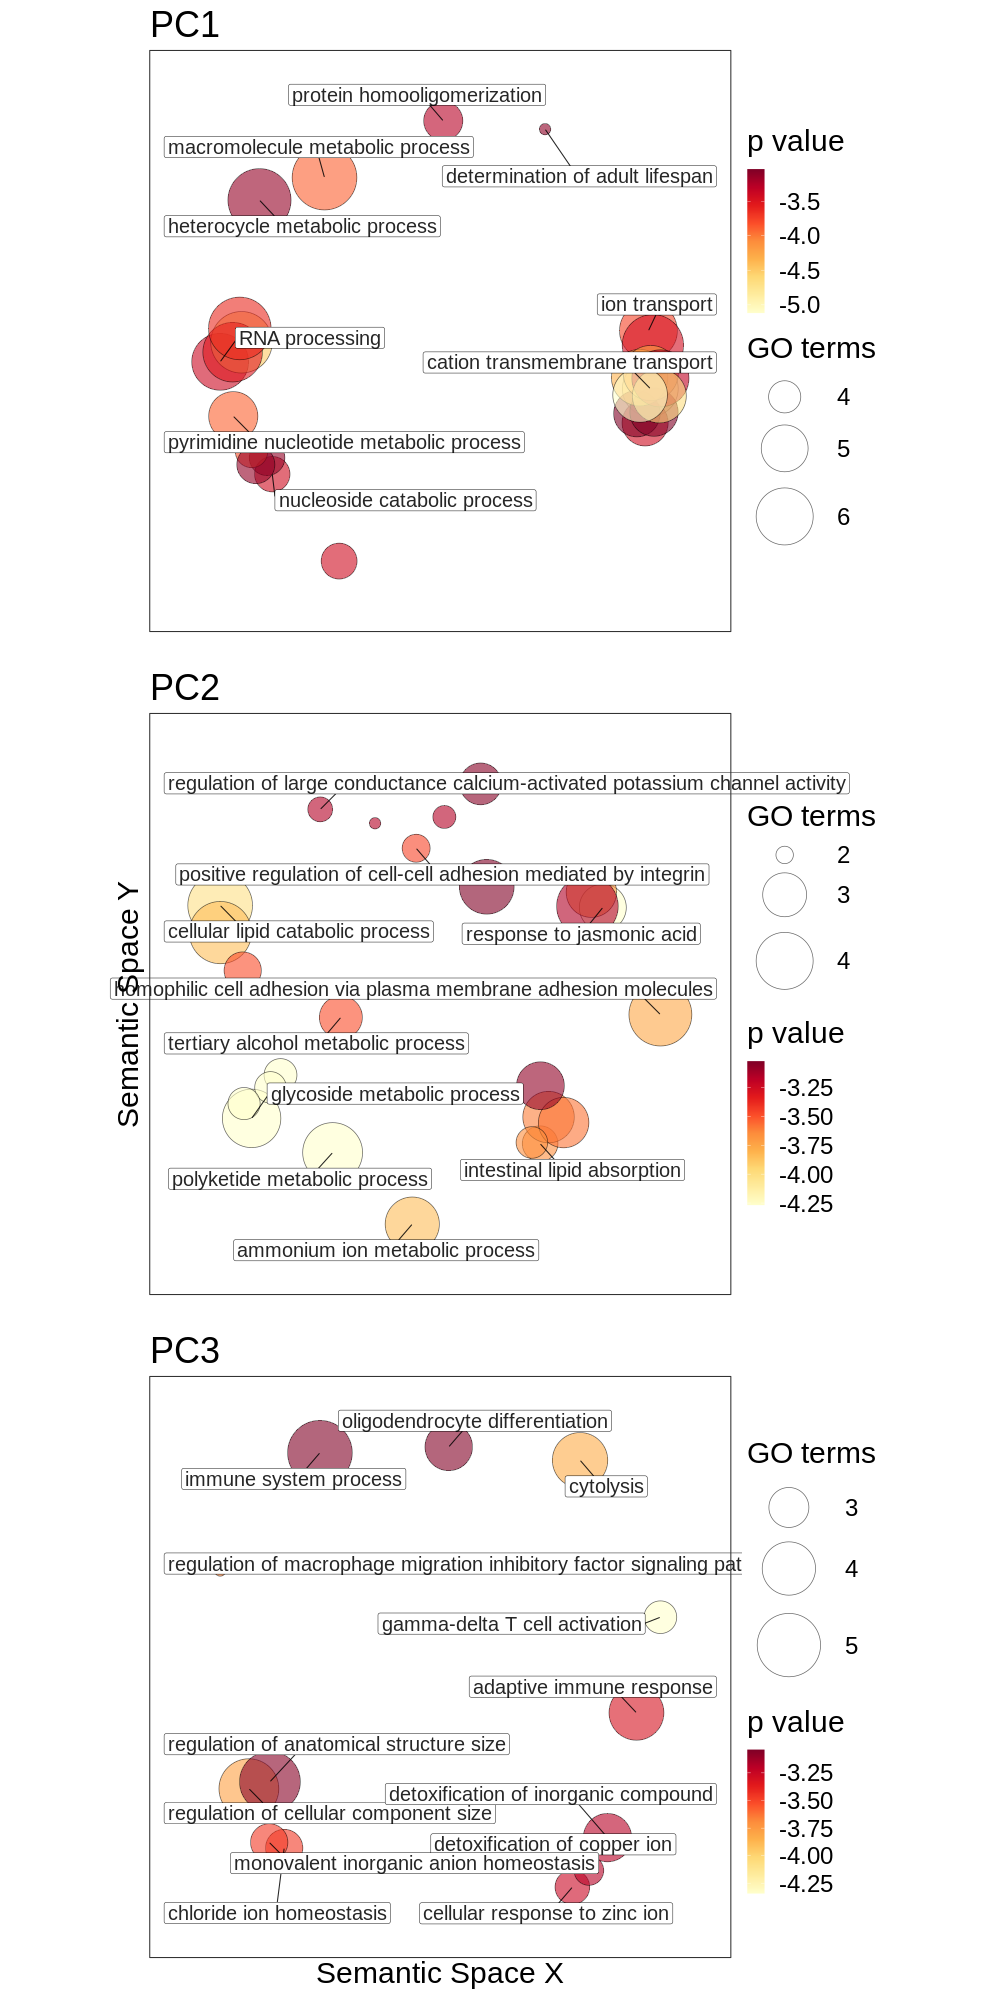

In [158]:
%%R -w 1000 -h 2000
source("../code/enrichmentsPlots.R")

g1 <- plot_revigo_data("../outputs/revigo_pc1pos.R", text_threshold=.5, 'PC1') + xlab('') + ylab('')
g2 <- plot_revigo_data("../outputs/revigo_pc2pos.R", text_threshold=.2, 'PC2') + xlab('')
g3 <- plot_revigo_data("../outputs/revigo_pc3pos.R", text_threshold=.8, 'PC3') + ylab('')

(g1 / g2 / g3)